In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [6]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head(3)     

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
df.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [8]:
df.fillna(df["Age"].mode()[0], inplace=True)
df["Age"] = df["Age"].astype(int)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.551066,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.207013,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


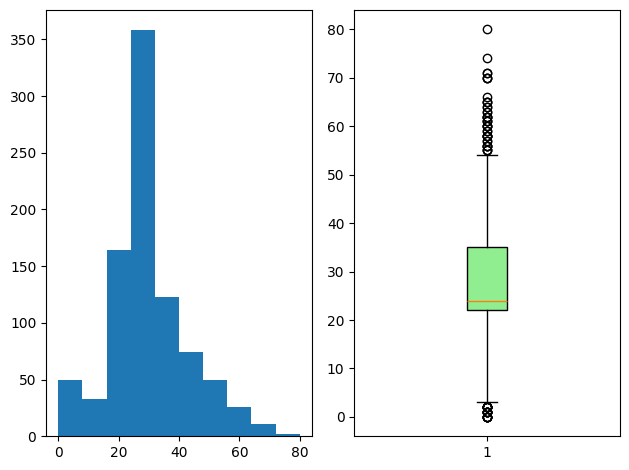

In [10]:
plt.subplot(1,2,1)
plt.hist(x=df['Age'])

plt.subplot(1,2,2)
plt.boxplot(df["Age"],patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.tight_layout()
plt.show()

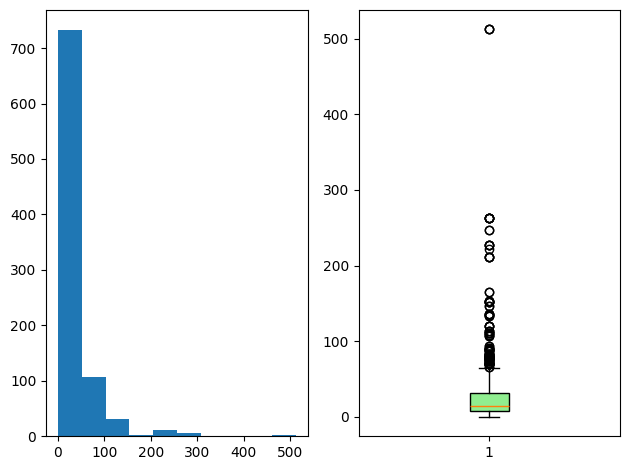

In [11]:
plt.subplot(1,2,1)
plt.hist(x=df['Fare'])

plt.subplot(1,2,2)
plt.boxplot(df["Fare"],patch_artist=True, boxprops=dict(facecolor="lightgreen"))
plt.tight_layout()
plt.show()

In [12]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22,1,0,7.2500,False,False,True
1,2,1,1,0,38,1,0,71.2833,True,False,False
2,3,1,3,0,26,0,0,7.9250,False,False,True
3,4,1,1,0,35,1,0,53.1000,False,False,True
4,5,0,3,1,35,0,0,8.0500,False,False,True


In [13]:
df["Embarked_C"] = df["Embarked_C"].astype(int)
df["Embarked_Q"] = df["Embarked_Q"].astype(int)
df["Embarked_S"] = df["Embarked_S"].astype(int)

In [66]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22,1,0,7.2500,0,0,1
1,2,1,1,0,38,1,0,71.2833,1,0,0
2,3,1,3,0,26,0,0,7.9250,0,0,1
3,4,1,1,0,35,1,0,53.1000,0,0,1
4,5,0,3,1,35,0,0,8.0500,0,0,1


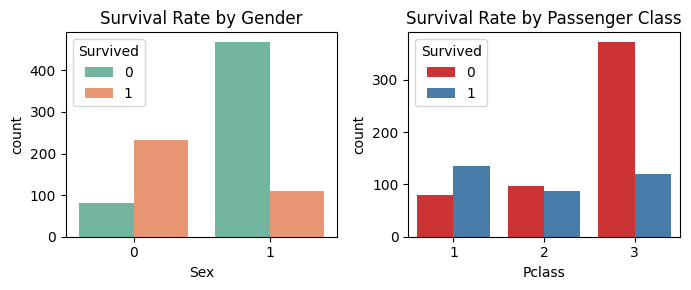

In [14]:
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set2")
plt.title("Survival Rate by Gender")

plt.subplot(1,2,2)
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set1")
plt.title("Survival Rate by Passenger Class")
plt.tight_layout()


plt.show()

C:\Users\cd347\AppData\Local\Temp\ipykernel_5504\3972140553.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass", y="Fare", data=df, palette="Pastel1")


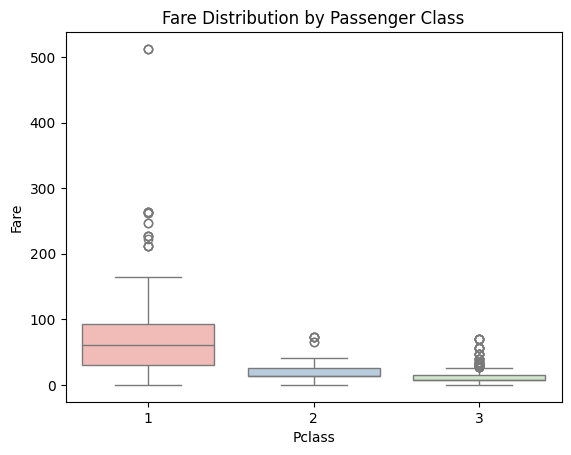

In [15]:
sns.boxplot(x="Pclass", y="Fare", data=df, palette="Pastel1")
plt.title("Fare Distribution by Passenger Class")
plt.show()


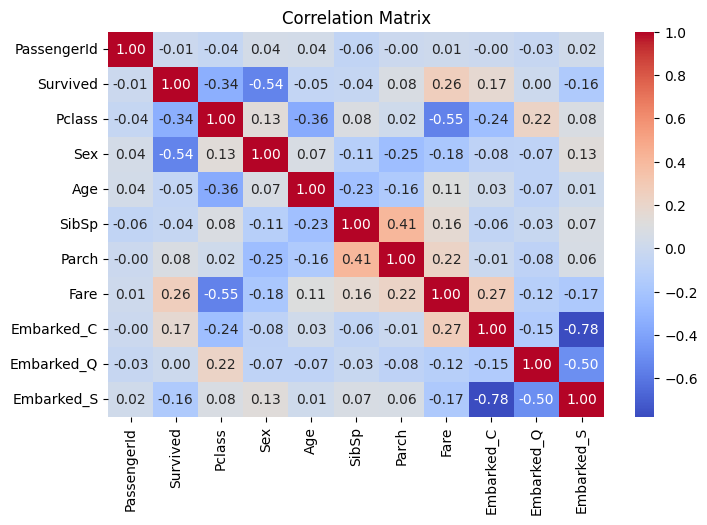

In [16]:
corr = df.select_dtypes(include="number").corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# Make Basic Feature-Level Inferences

# Sex	Females survived more	
# Gender strongly affects survival
# Pclass	Higher class → more survival	
# Socioeconomic status important
# Age	Young children had higher survival	
# “Women and children first” pattern
# Fare	Higher fare correlates with survival	
# Rich passengers had better access
# Embarked	Port of embarkation affects outcome	Possibly linked to class differences